# Banknote Authetication

Let's analyze and preprocess the data. This data was extracted from the [UCI repository](http://archive.ics.uci.edu/ml/datasets/banknote+authentication) which says that: 
    
    Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

So the attribute information are:

1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer) 

## Dependencies


In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [3]:
banknote = pd.read_csv('data_banknote_authentication.txt')

In [4]:
banknote

,3.6216,8.6661,-2.8073,-0.44699,0
0,4.545900,8.16740,-2.458600,-1.462100,0
1,3.866000,-2.63830,1.924200,0.106450,0
2,3.456600,9.52280,-4.011200,-3.594400,0
3,0.329240,-4.45520,4.571800,-0.988800,0
4,4.368400,9.67180,-3.960600,-3.162500,0
5,3.591200,3.01290,0.728880,0.564210,0
6,2.092200,-6.81000,8.463600,-0.602160,0
7,3.203200,5.75880,-0.753450,-0.612510,0
8,1.535600,9.17720,-2.271800,-0.735350,0
9,1.224700,8.77790,-2.213500,-0.806470,0


Let us adjust the header.

In [5]:
# Get the columns names as array
new_header = banknote.columns.values

#header = new_header.copy()
#header[5]='convenient'
# Create the columns
cols = ['var_wavelet','skewness_wavelet','curtosis_wavelet','entropy','target']
new_header

array(['3.6216', '8.6661', '-2.8073', '-0.44699', '0'], dtype=object)

In [6]:
# Create a DataFrame from the hedader
bna = pd.DataFrame(new_header.astype(float)[None,:],columns=list(new_header))

# Transform the type of classes as integer
bna['0'] = bna['0'].astype('int64')
# Append both the dataframes
bna = bna.append(banknote)
# Rename the columns
cols = {new_header[i]:cols[i] for i in range(new_header.size)}
#cols['0']='target'
bna=bna.rename(columns=cols)


bna.head(10)

,var_wavelet,skewness_wavelet,curtosis_wavelet,entropy,target
0,3.62160,8.6661,-2.80730,-0.44699,0
0,4.54590,8.1674,-2.45860,-1.46210,0
1,3.86600,-2.6383,1.92420,0.10645,0
2,3.45660,9.5228,-4.01120,-3.59440,0
3,0.32924,-4.4552,4.57180,-0.98880,0
4,4.36840,9.6718,-3.96060,-3.16250,0
5,3.59120,3.0129,0.72888,0.56421,0
6,2.09220,-6.8100,8.46360,-0.60216,0
7,3.20320,5.7588,-0.75345,-0.61251,0
8,1.53560,9.1772,-2.27180,-0.73535,0


## Data information and Description

In [7]:
bna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1372 entries, 0 to 1370
Data columns (total 5 columns):
var_wavelet         1372 non-null float64
skewness_wavelet    1372 non-null float64
curtosis_wavelet    1372 non-null float64
entropy             1372 non-null float64
target              1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 64.3 KB


There are no missing data, all the features are of the type float, and the classes are all integers. There are no need to preprocess for while.

In [8]:
bna.describe()

,var_wavelet,skewness_wavelet,curtosis_wavelet,entropy,target
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


There are no need to standarlize, so I will maintain the data the way it is. Now, let's see the class distribution.

In [9]:
count = bna['target'].value_counts().rename_axis('Unique').to_frame('Counts')
count

,Counts
Unique,
0,762
1,610


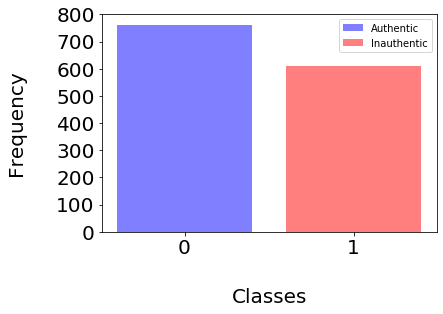

Authentic: 55.54%
Inauthentic: 44.46%
Ratio Nasal/Oral: 124.92%


In [10]:
plt.bar(np.arange(1),count['Counts'][0],color='b',alpha=0.5, label='Authentic')
plt.bar(np.arange(1)+1,count['Counts'][1],color='r',alpha=0.5, label='Inauthentic')
plt.xlabel('Classes',fontsize=20, labelpad=30)
plt.ylabel('Frequency',fontsize=20, labelpad=30)
plt.xticks(np.arange(2),['0','1'],fontsize=20)
plt.yticks(fontsize=20)
plt.legend()
plt.show()
print("Authentic: {}%".format(round(count['Counts'][0]*100/count['Counts'].sum(),2)))
print("Inauthentic: {}%".format(round(count['Counts'][1]*100/count['Counts'].sum(),2)))
print("Ratio Nasal/Oral: {}%".format(round((count['Counts'][0]/count['Counts'][1])*100,2)))

The distribution isn't so unequal, so there is nothing to be changed.

Let's save the data

In [11]:
bna.columns

Index(['var_wavelet', 'skewness_wavelet', 'curtosis_wavelet', 'entropy',
       'target'],
      dtype='object')

In [17]:
bna.to_csv('banknote.data')